<a href="https://colab.research.google.com/github/ilhamfachlevi/Data-Science-Project-4-Ecommerce-A-B-Testing/blob/main/ABTesting2022_DS03107_Muhammad_Ilham_Fachlevi_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Installation

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
# import kaggle json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"milhamfachlevi","key":"b7c866182fbd6d70be22a6aff25d66b1"}'}

In [ ]:
# create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder created  
!cp kaggle.json ~/.kaggle/

In [ ]:
# permisson for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all avalaible datasets in kaggle
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                     9KB  2022-10-06 08:55:25           6369        210  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset              11KB  2022-09-30 04:05:11           5149        164  1.0              
akshaydattatraykhare/car-details-dataset                        Car Details Dataset                                 56KB  2022-10-21 06:11:56           1133         29  1.0              
whenamancodes/students-performance-in-exams                     S

In [ ]:
!kaggle datasets download -d putdejudomthai/ecommerce-ab-testing-2022-dataset1

  0% 0.00/3.29M [00:00<?, ?B/s]
100% 3.29M/3.29M [00:00<00:00, 85.4MB/s]


In [ ]:
ls

ecommerce-ab-testing-2022-dataset1.zip  kaggle.json  sample_data/


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import KNNImputer
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.proportion as sp
import scipy.stats as stats
import zipfile

In [ ]:
with zipfile.ZipFile("/content/ecommerce-ab-testing-2022-dataset1.zip","r") as zip_ref:
    zip_ref.extractall("ab_testing_2022")

# Initializing Variables

In [ ]:
ab_data = pd.read_csv('/content/ab_testing_2022/ecommerce_ab_testing_2022_dataset1/ab_data.csv')
countries = pd.read_csv('/content/ab_testing_2022/ecommerce_ab_testing_2022_dataset1/countries.csv')

In [ ]:
ab_data

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0
294477,715931,40:24.5,treatment,new_page,0
294478,759899,20:29.0,treatment,new_page,0


In [ ]:
countries

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290581,799368,UK
290582,655535,CA
290583,934996,UK
290584,759899,US


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290586 entries, 0 to 290585
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290586 non-null  int64 
 1   country  290586 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


# Data Cleaning

In [ ]:
countries[countries["user_id"].duplicated()]

,user_id,country
290584,759899,US


In [ ]:
countries[countries["user_id"]==759899]

,user_id,country
105301,759899,US
290584,759899,US


In [ ]:
countries = countries.drop_duplicates()

In [ ]:
sum(countries.duplicated())

0

In [ ]:
ab_data[ab_data["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2656,698120,13:42.6,control,old_page,0
2893,773192,55:59.6,treatment,new_page,0
7500,899953,06:54.1,control,new_page,0
8036,790934,32:20.3,treatment,new_page,0
10218,633793,16:00.7,treatment,old_page,0
...,...,...,...,...,...
294309,787083,15:21.0,control,old_page,0
294328,641570,59:27.7,control,old_page,0
294331,689637,34:28.3,control,new_page,0
294355,744456,32:07.1,treatment,new_page,0


In [ ]:
ab_data = ab_data.drop_duplicates()

In [ ]:
sum(ab_data.duplicated())

0

# Merging Data

In [ ]:
df = ab_data.merge(countries)
df

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
...,...,...,...,...,...,...
294475,945152,51:57.1,control,old_page,0,US
294476,734608,45:03.4,control,old_page,0,US
294477,697314,20:29.0,control,old_page,0,US
294478,715931,40:24.5,treatment,new_page,0,UK


In [ ]:
df.sample()

,user_id,timestamp,group,landing_page,converted,country
149806,697869,26:35.6,treatment,new_page,0,US


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294480 entries, 0 to 294479
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
 5   country       294480 non-null  object
dtypes: int64(2), object(4)
memory usage: 15.7+ MB


In [ ]:
df[['group','landing_page']] = df[['group','landing_page']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294480 entries, 0 to 294479
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   user_id       294480 non-null  int64   
 1   timestamp     294480 non-null  object  
 2   group         294480 non-null  category
 3   landing_page  294480 non-null  category
 4   converted     294480 non-null  int64   
 5   country       294480 non-null  object  
dtypes: category(2), int64(2), object(2)
memory usage: 11.8+ MB


# Defining Set & Searching for Mismatch from Dataset

In [ ]:
set(list(df['landing_page']))

{'new_page', 'old_page'}

In [ ]:
set(list(df['group']))

{'control', 'treatment'}

In [ ]:
mismatch = df[(df["group"]=="control")&(df["landing_page"]=="new_page")
                |(df["group"]=="treatment")&(df["landing_page"]=="old_page")].index
number_mismatch = mismatch.shape[0]
print(f"Number of Mismatch:{number_mismatch} rows" )
print("Mismatch Percentage:%.1f%%" % (number_mismatch/df.shape[0]*100), "rows")

Number of Mismatch:3893 rows
Mismatch Percentage:1.3% rows


In [ ]:
df.drop(mismatch, inplace = True)

In [ ]:
df.drop_duplicates(subset="user_id", inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294479
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   user_id       290585 non-null  int64   
 1   timestamp     290585 non-null  object  
 2   group         290585 non-null  category
 3   landing_page  290585 non-null  category
 4   converted     290585 non-null  int64   
 5   country       290585 non-null  object  
dtypes: category(2), int64(2), object(2)
memory usage: 11.6+ MB


In [ ]:
df.shape

(290585, 6)

In [ ]:
df[df["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted,country


# Data Visualization EDA

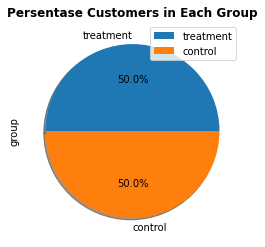

In [ ]:
df['group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

plt.title(f"Persentase Customers in Each Group", weight='bold')
plt.legend()    
plt.show()

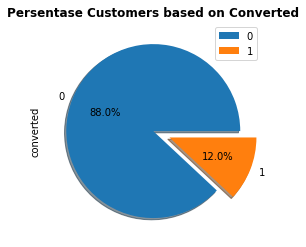

In [ ]:
myexplode = [0, 0.2]
df['converted'].value_counts(ascending=False).plot.pie(autopct='%1.1f%%', shadow=True, explode=myexplode)

plt.title(f"Persentase Customers based on Converted", weight='bold')
plt.legend()    
plt.show()

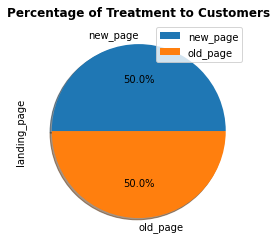

In [ ]:
df['landing_page'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

plt.title(f"Percentage of Treatment to Customers", weight='bold')
plt.legend()
    
plt.show()

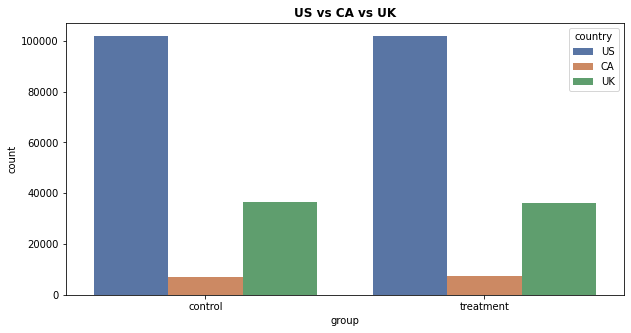

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df,x="group", hue="country", palette='deep')

plt.title(f"US vs CA vs UK", weight='bold')
plt.show()

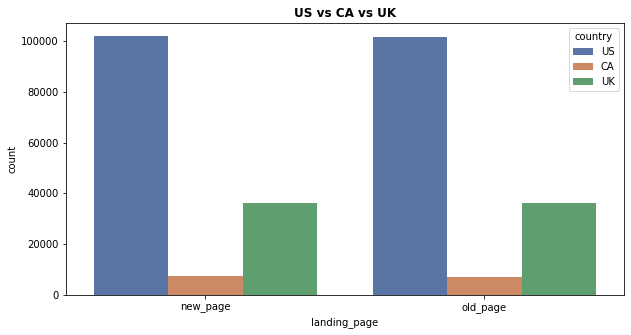

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df,x="landing_page", hue="country", palette='deep')

plt.title(f"US vs CA vs UK", weight='bold')
plt.show()

# Conversion Rate

In [ ]:
control = df[df["group"] == "control"]
treatment = df[df["group"] == "treatment"]

control_perc = round(control.converted.sum() / control.converted.shape[0] * 100, 2)
treatment_perc = round(treatment.converted.sum() / treatment.converted.shape[0] * 100, 2)

print(f"Control Conversion Rate: {control_perc}%")
print(f"Treatment Conversion Rate: {treatment_perc}%")

Control Conversion Rate: 12.04%
Treatment Conversion Rate: 11.88%


In [ ]:
total_spend = df.groupby(['landing_page'])['converted'].sum().reset_index()
total_spend

,landing_page,converted
0,new_page,17264
1,old_page,17489


# Checking Data Distribution

In [ ]:
groupA = df[df['landing_page'] == "old_page"]['converted']
groupB = df[df['landing_page'] == "new_page"]['converted']

In [ ]:
ntA = shapiro(groupA)[1] < 0.05
ntB = shapiro(groupB)[1] < 0.05

In [ ]:
print(ntA,ntB)

True True


In [ ]:
 leveneTest = stats.levene(groupA, groupB)[1] < 0.05

In [ ]:
leveneTest

False

# Chi Squared Test & P value Test

In [ ]:
control_converted = control["converted"].sum()
treatment_converted = treatment["converted"].sum()
control_not_converted = control["converted"].count() - control_converted
treatment_not_converted = treatment["converted"].count() - treatment_converted
contignency_table = np.array([[control_converted, control_not_converted],
                             [treatment_converted, treatment_not_converted]])

In [ ]:
chi, p_value, _, _ = chi2_contingency(contignency_table, correction=False)

In [ ]:
chi, p_value

(1.720314323018192, 0.1896525897188101)

In [ ]:
ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]

In [ ]:
ttest

0.18965383906859376

In [ ]:
ttest = stats.mannwhitneyu(groupA, groupB)[1] 

In [ ]:
ttest

0.18965336487086848

In [ ]:
alpha = round(1 - 0.95, 2)
print(f"Significance: {alpha}, p-value: {p_value}")

if p_value <= alpha:
    print("Success to reject H0 ")
else:
    print("Failed to reject H0")

Significance: 0.05, p-value: 0.1896525897188101
Failed to reject H0
